<a href="https://colab.research.google.com/github/Kim-Byeong-Hun/Bigdata_contest2020/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, 0:1],
                                                    housing.target, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 1) (5160, 1) (15480,) (5160,)


In [4]:
x0 = np.ones((X_train.shape[0],1))
X = np.hstack((x0, X_train))
print(X.shape)

(15480, 2)


In [5]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
print(w)

[0.44967564 0.41788087]


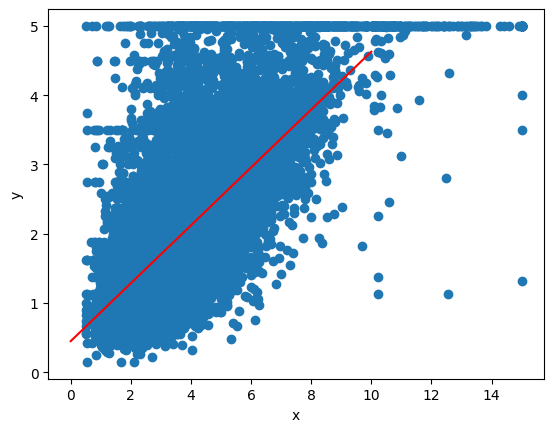

In [6]:
plt.scatter(X_train, y_train)
plt.plot([0, 10], [w[0], 10*w[1]+w[0]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.47083837938023365

In [8]:
y_pred = lr.predict(X_test)
r2 = 1 - ((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum()
print(r2)

0.47083837938023365


In [9]:
print(lr.coef_, lr.intercept_)

[0.41788087] 0.4496756419968606


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

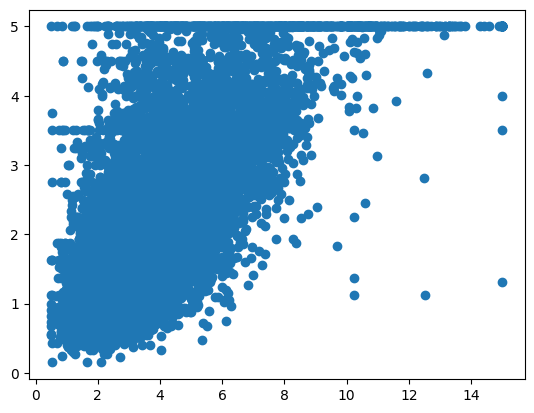

In [10]:
plt.scatter(X_train, y_train)
plt.plot([0, 10], [lr.intercept_, 10 * lr.coef_ + lr.intercept_], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train, y_train)
print(lr_no_intercept.coef_, lr_no_intercept.intercept_)

[0.51131441] 0.0


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

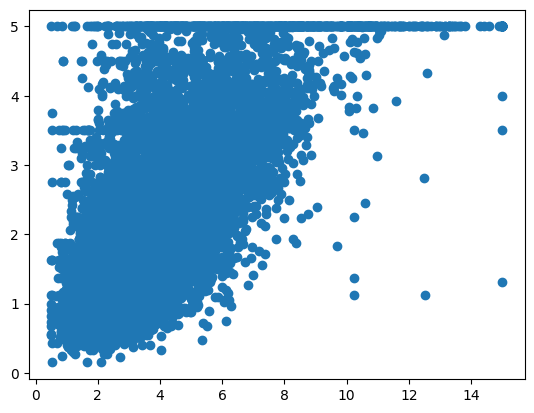

In [14]:
plt.scatter(X_train, y_train)
plt.plot([0, 10], [lr_no_intercept.intercept_, 10 * lr_no_intercept.coef_ + lr_no_intercept.intercept_], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
lr_no_intercept.coef_

array([0.51131441])